# Final Project
This is my final project of the MAP 674 class. This project will show everything I did, and a ReadMe file is included for the steps on how the process is done.

## Importing programs
I will import the following programs below.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import leafmap

## Topic
The topic of my final project will be related to Australia. This final project will involve several maps and datas featuring Australia.

In [2]:
coords = (-25, 133)
print(coords)

coords[0]

(-25, 133)


-25

## Creating spatial overlays
In this section, I will use what I learned in the geopandas assignment and create the spatial overlays for Australia.

### Importing the data
In this section, I will be importing data to clip the points for Australia. These data are imported from <a href="https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-populated-places/">this link</a> and <a href="https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/">this link</a>. I then filtered both and exported them as geojsons to focus on Australia.

In [3]:
countries = gpd.read_file('/Users/markmarji/Documents/GitHub/Final-Project-MAP674/data/ne_50m_admin_0_australia.geojson')
pop_places = gpd.read_file('/Users/markmarji/Documents/GitHub/Final-Project-MAP674/data/ne_50m_populated_places_australia.geojson')

In [4]:
# change default figsize
plt.rcParams['figure.figsize'] = (14, 8)

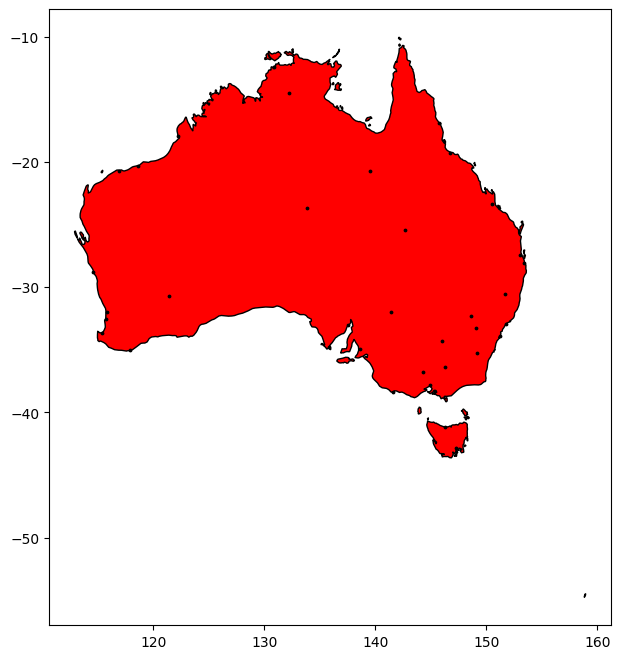

In [5]:
fig, ax = plt.subplots()

base_color = '#000000'
border_color = base_color
marker_color = '#000000'

countries.plot(ax=ax, edgecolor=border_color, color='#FF0000', zorder=1);
pop_places.plot(ax=ax, color=marker_color, markersize=3, zorder=2);

## Clipping points
In this section, I will clip the points for Australia.

### Setting up the plot
In this section, I will set up the plot for Australia.

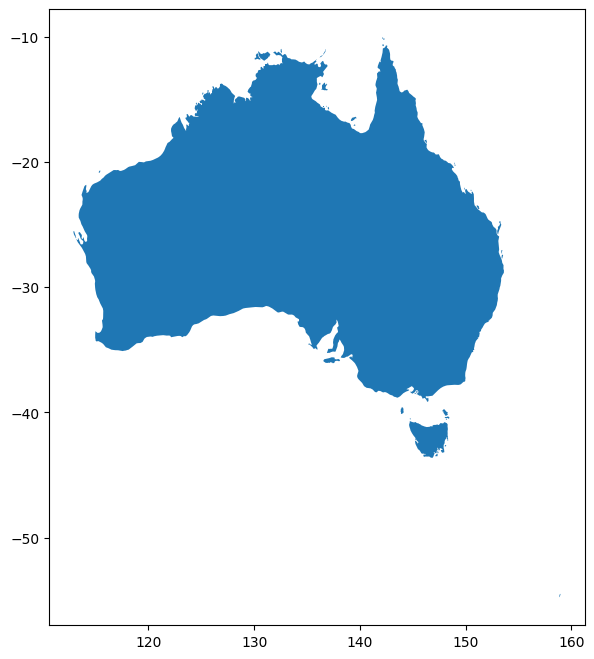

In [6]:
australia = countries.loc[countries['NAME'] == 'Australia']
australia.plot(); 

In [7]:
australia.geom_type.unique()

array(['MultiPolygon'], dtype=object)

In [8]:
# use unary_union to combine polygons into single
australia_poly = australia.geometry.unary_union

In [9]:
# create new GeoDataFrame of points that intersect with the clipping polygon
australia_places = pop_places[pop_places.geometry.intersects(australia_poly)]

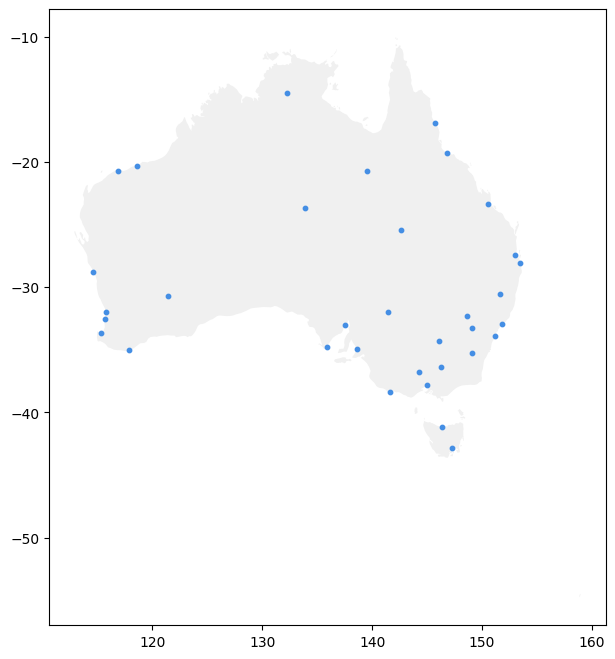

In [10]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

australia.plot(ax=ax, color=base_color, zorder=0);
australia_places.plot(ax=ax, color=marker_color, markersize=10, zorder=1);

### Clipping the points
This shows how I clipped the points of major cities in Australia.

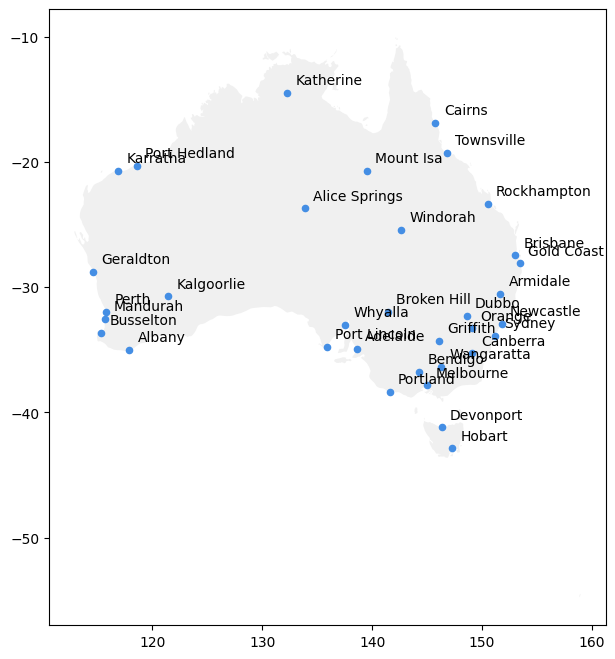

In [11]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
marker_color = '#448ee4'

australia.plot(ax=ax, color=base_color, zorder=0);
australia_places.plot(ax=ax, color=marker_color, markersize=20, zorder=1);

australia_places.apply(lambda x: ax.annotate(text=x['NAME'],
                                  xy=x.geometry.coords[0],
                                  xytext=(6, 6),
                                  textcoords="offset points"),
                              axis=1);

## Leafmap
This section will show how I apply Leafmap with the map of Australia. I followed the steps from <a href="https://leafmap.org/get-started/">this link as</a> a guide to create several Leafmap examples.

### Simple leafmap
This example below is a simple leafmap I created for Australia.

In [12]:
import leafmap
m = leafmap.Map(center=(-25, 133), zoom=4)
m

Map(center=[-25, 133], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Topo map
In this section, I will create Australia as a top map. To do this, I use the following example below and once it's run, it produces the map.

In [13]:
m = leafmap.Map(center=(-25, 133), zoom=4)
m.add_basemap("OpenTopoMap")
m

Map(center=[-25, 133], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Using CSV data
I will use the stuff I learned from the pandas module and use CSV data. In this case, I will be using data that focuses on the natural gas intensity of suburbs in Sydney. The link to the file is <a href="https://data.cityofsydney.nsw.gov.au/datasets/aa271eb7bd3248b4b237bb373da37062_0/explore">here</a>. This might also involve some plot charts as well.

In [14]:
natural_gas_df = pd.read_csv('/Users/markmarji/Documents/GitHub/Final-Project-MAP674/data/Natural_gas_intensity_by_suburb.csv') 

In [15]:
natural_gas_df.head()

,FID,NAME,F2005_06,F2006_07,F2007_08,F2008_09,F2009_10,F2010_11,F2011_12,F2012_13,F2013_14,F2014_15,F2015_16,F2016_17,F2017_18,F2018_19,Shape__Area,Shape__Length
0,1,Alexandria,42.699389,42.737589,43.899875,44.723233,45.075493,45.333445,46.198464,46.038964,45.984943,47.541577,47.307777,46.409201,47.639341,44.800826,5.129712e+06,12267.960868
1,2,Forest Lodge + Annandale,90.708791,87.590122,83.688848,75.311548,65.288680,54.395945,47.187422,40.732716,38.227136,37.171782,36.380251,35.692000,51.808575,62.339334,7.939478e+05,6817.416736
2,3,Millers Point + Barangaroo,55.348469,55.105834,61.499485,67.005499,72.065515,77.941762,87.220520,70.375023,59.722931,54.019767,49.252598,45.723442,51.186291,50.308036,6.739312e+05,4760.147743
3,4,Beaconsfield,50.157219,50.076656,53.604814,55.008900,55.364385,55.646268,57.088845,58.288753,59.425112,62.500420,64.945387,64.173608,61.883877,59.439430,2.438067e+05,2313.919409
4,5,Camperdown,132.766754,131.293895,129.555255,125.479377,120.690369,115.778241,113.424804,110.957617,110.097017,112.502182,110.564950,108.502906,112.574690,111.788042,1.561043e+06,6036.699734


In [16]:
natural_gas_df.tail()

,FID,NAME,F2005_06,F2006_07,F2007_08,F2008_09,F2009_10,F2010_11,F2011_12,F2012_13,F2013_14,F2014_15,F2015_16,F2016_17,F2017_18,F2018_19,Shape__Area,Shape__Length
24,25,Sydney,69.885309,69.820684,71.626104,72.777900,73.511002,74.110244,75.571057,75.697700,76.284453,79.310218,79.309764,77.532434,78.274728,74.119234,4.251640e+06,15013.924882
25,26,The Rocks,121.028525,121.137169,123.373850,124.663160,125.530135,126.068453,127.568613,127.322924,127.772343,132.938669,132.253196,124.637603,116.797010,107.423574,3.091627e+05,3549.528034
26,27,Ultimo,69.382743,69.281243,71.278519,72.642694,72.881911,72.986345,74.530149,74.594192,74.800190,77.624406,78.726757,76.045701,72.931946,68.616143,8.140791e+05,4006.055240
27,28,Woolloomooloo,81.682391,81.189867,84.518464,86.836307,87.552551,88.156037,90.911718,90.533546,90.491818,93.696467,95.609490,91.844314,88.467179,84.324970,5.987029e+05,5148.999526
28,29,Zetland,45.486261,46.164084,48.861159,51.755598,53.188440,54.397838,56.729046,51.995728,47.814191,46.157784,43.773009,48.849439,78.107103,92.899936,1.165677e+06,4386.329175


In [17]:
# Get info about the DataFrame
natural_gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            29 non-null     int64  
 1   NAME           29 non-null     object 
 2   F2005_06       29 non-null     float64
 3   F2006_07       29 non-null     float64
 4   F2007_08       29 non-null     float64
 5   F2008_09       29 non-null     float64
 6   F2009_10       29 non-null     float64
 7   F2010_11       29 non-null     float64
 8   F2011_12       29 non-null     float64
 9   F2012_13       29 non-null     float64
 10  F2013_14       29 non-null     float64
 11  F2014_15       29 non-null     float64
 12  F2015_16       29 non-null     float64
 13  F2016_17       29 non-null     float64
 14  F2017_18       29 non-null     float64
 15  F2018_19       29 non-null     float64
 16  Shape__Area    29 non-null     float64
 17  Shape__Length  29 non-null     float64
dtypes: float64(1

In [18]:
# The df.describe() method is useful for quickly gaining basic stastics about the entire dataset
# Obviously the mean or standard deviation for FIPS state or county codes makes no sense, but the
# values for the year cases of lyme disease are potentially useful.
natural_gas_df.describe()

,FID,F2005_06,F2006_07,F2007_08,F2008_09,F2009_10,F2010_11,F2011_12,F2012_13,F2013_14,F2014_15,F2015_16,F2016_17,F2017_18,F2018_19,Shape__Area,Shape__Length
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000
mean,15.000000,77.761780,77.448827,80.335606,81.305082,80.868923,80.316605,81.598809,81.111111,81.243425,84.399059,85.273848,83.035065,83.880185,82.014342,1.338230e+06,6019.926504
std,8.514693,25.086396,24.807592,25.374841,25.099767,24.766963,24.672684,25.213503,25.893774,26.864765,28.991984,29.921497,28.467261,24.266122,22.743746,1.266281e+06,3003.621491
min,1.000000,26.674955,27.153826,30.321879,30.606158,30.635393,30.607010,30.515673,31.470638,32.196756,33.868368,34.780425,34.372559,39.510019,40.890350,2.013928e+05,2313.919409
25%,8.000000,61.799504,61.514911,63.226418,67.005499,65.288680,63.490568,64.620145,65.429946,65.301818,68.581032,65.166152,64.173608,65.522530,63.698193,5.987029e+05,3817.570308
50%,15.000000,75.263696,74.938076,78.344820,80.692593,79.700008,78.689475,82.785374,80.681701,76.284453,79.310218,79.309764,77.532434,88.467179,86.380013,8.140791e+05,5148.999526
75%,22.000000,89.473013,87.764957,92.737898,94.167887,93.818257,93.380044,96.223569,99.776850,102.547128,107.255716,107.737784,107.101072,99.699072,98.538677,1.561043e+06,6817.416736
max,29.000000,132.766754,131.293895,129.555255,128.116223,125.603116,126.068453,127.568613,127.322924,128.453217,136.447373,133.996292,132.607123,127.459666,122.013302,5.129712e+06,15013.924882


In [19]:
# we can now calculate the shape area for each suburb
Shape__Length  = natural_gas_df.groupby('NAME')['Shape__Length'].mean().reset_index()
Shape__Length

,NAME,Shape__Length
0,Alexandria,12267.960868
1,Beaconsfield,2313.919409
2,Camperdown,6036.699734
3,Centennial Park,4744.915097
4,Chippendale,3814.859069
5,Darlinghurst,5875.264363
6,Darlington,3462.224751
7,Dawes Point,3690.511058
8,Elizabeth Bay,3330.450836
9,Erskineville,5276.487750


## Creating plots
This will show examples of plots I have created.

### Bar plot
This example is a bar plot that represents the natural gas intensity by 12 suburbs in Australia. This is a horizontal bar plot, which is shown below. What I did was use `plt.barh()` to create it.

#### Bar plot heads
This is the head section of the bar plot and it consists of 12 suburbs in Sydney.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
 
# x-axis values 
name = df['NAME'].head(12)

# Y-axis values 
length = df['Shape__Length'].head(12)

plt.barh(name, length, color = "red")
plt.show()

NameError: name 'df' is not defined

#### Bar plot tails
This is the tail section of the bar plot and it consists of 12 suburbs in Sydney.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
 
# x-axis values 
name = df['NAME'].tail(12)

# Y-axis values 
length = df['Shape__Length'].tail(12)

plt.barh(name, length, color = "red")
plt.show()

NameError: name 'df' is not defined

### Scatter plot
This is a scatter plot for the natural gas intensity by 12 suburbs in Sydney. The `x` will represent the `length` and the `y` will represent the `name`.

#### Scatter plot head
This is the head section of the scatter plot and it consists of 12 suburbs in Sydney.

In [22]:
# importing matplotlib module 
from matplotlib import pyplot as plt 
 
# x-axis values 
length = df['Shape__Length'].head(12)

# Y-axis values 
name = df['NAME'].head(12)
 
# Function to plot scatter 
plt.scatter(length, name) 
 
# Adding Title
plt.title("Natural Gas Intensity by Suburb")

# function to show the plot 
plt.show() 

NameError: name 'df' is not defined

#### Scatter plot tails
This is the tail section of the scatter plot and it consists of 12 suburbs in Sydney.

In [23]:
# importing matplotlib module 
from matplotlib import pyplot as plt 
 
# x-axis values 
length = df['Shape__Length'].tail(12)

# Y-axis values 
name = df['NAME'].tail(12)
 
# Function to plot scatter 
plt.scatter(length, name) 
 
# Adding Title
plt.title("Natural Gas Intensity by Suburb")

# function to show the plot 
plt.show() 

NameError: name 'df' is not defined